# Kai Ru

In [1]:
import pandas as pd
import numpy as np
data=pd.read_excel("S&P 100 constituents Aktienkurse-work.xlsx",encoding="SHIFT-JIS",header=3)
data=data.drop(labels=0)
data=data.reset_index(drop= True)
data.index=data["Name"]
data=data.drop(["Name"],axis=1)
data=data.dropna(axis=1)
symbols = data.columns
df = data[symbols]
df=df.astype("float")

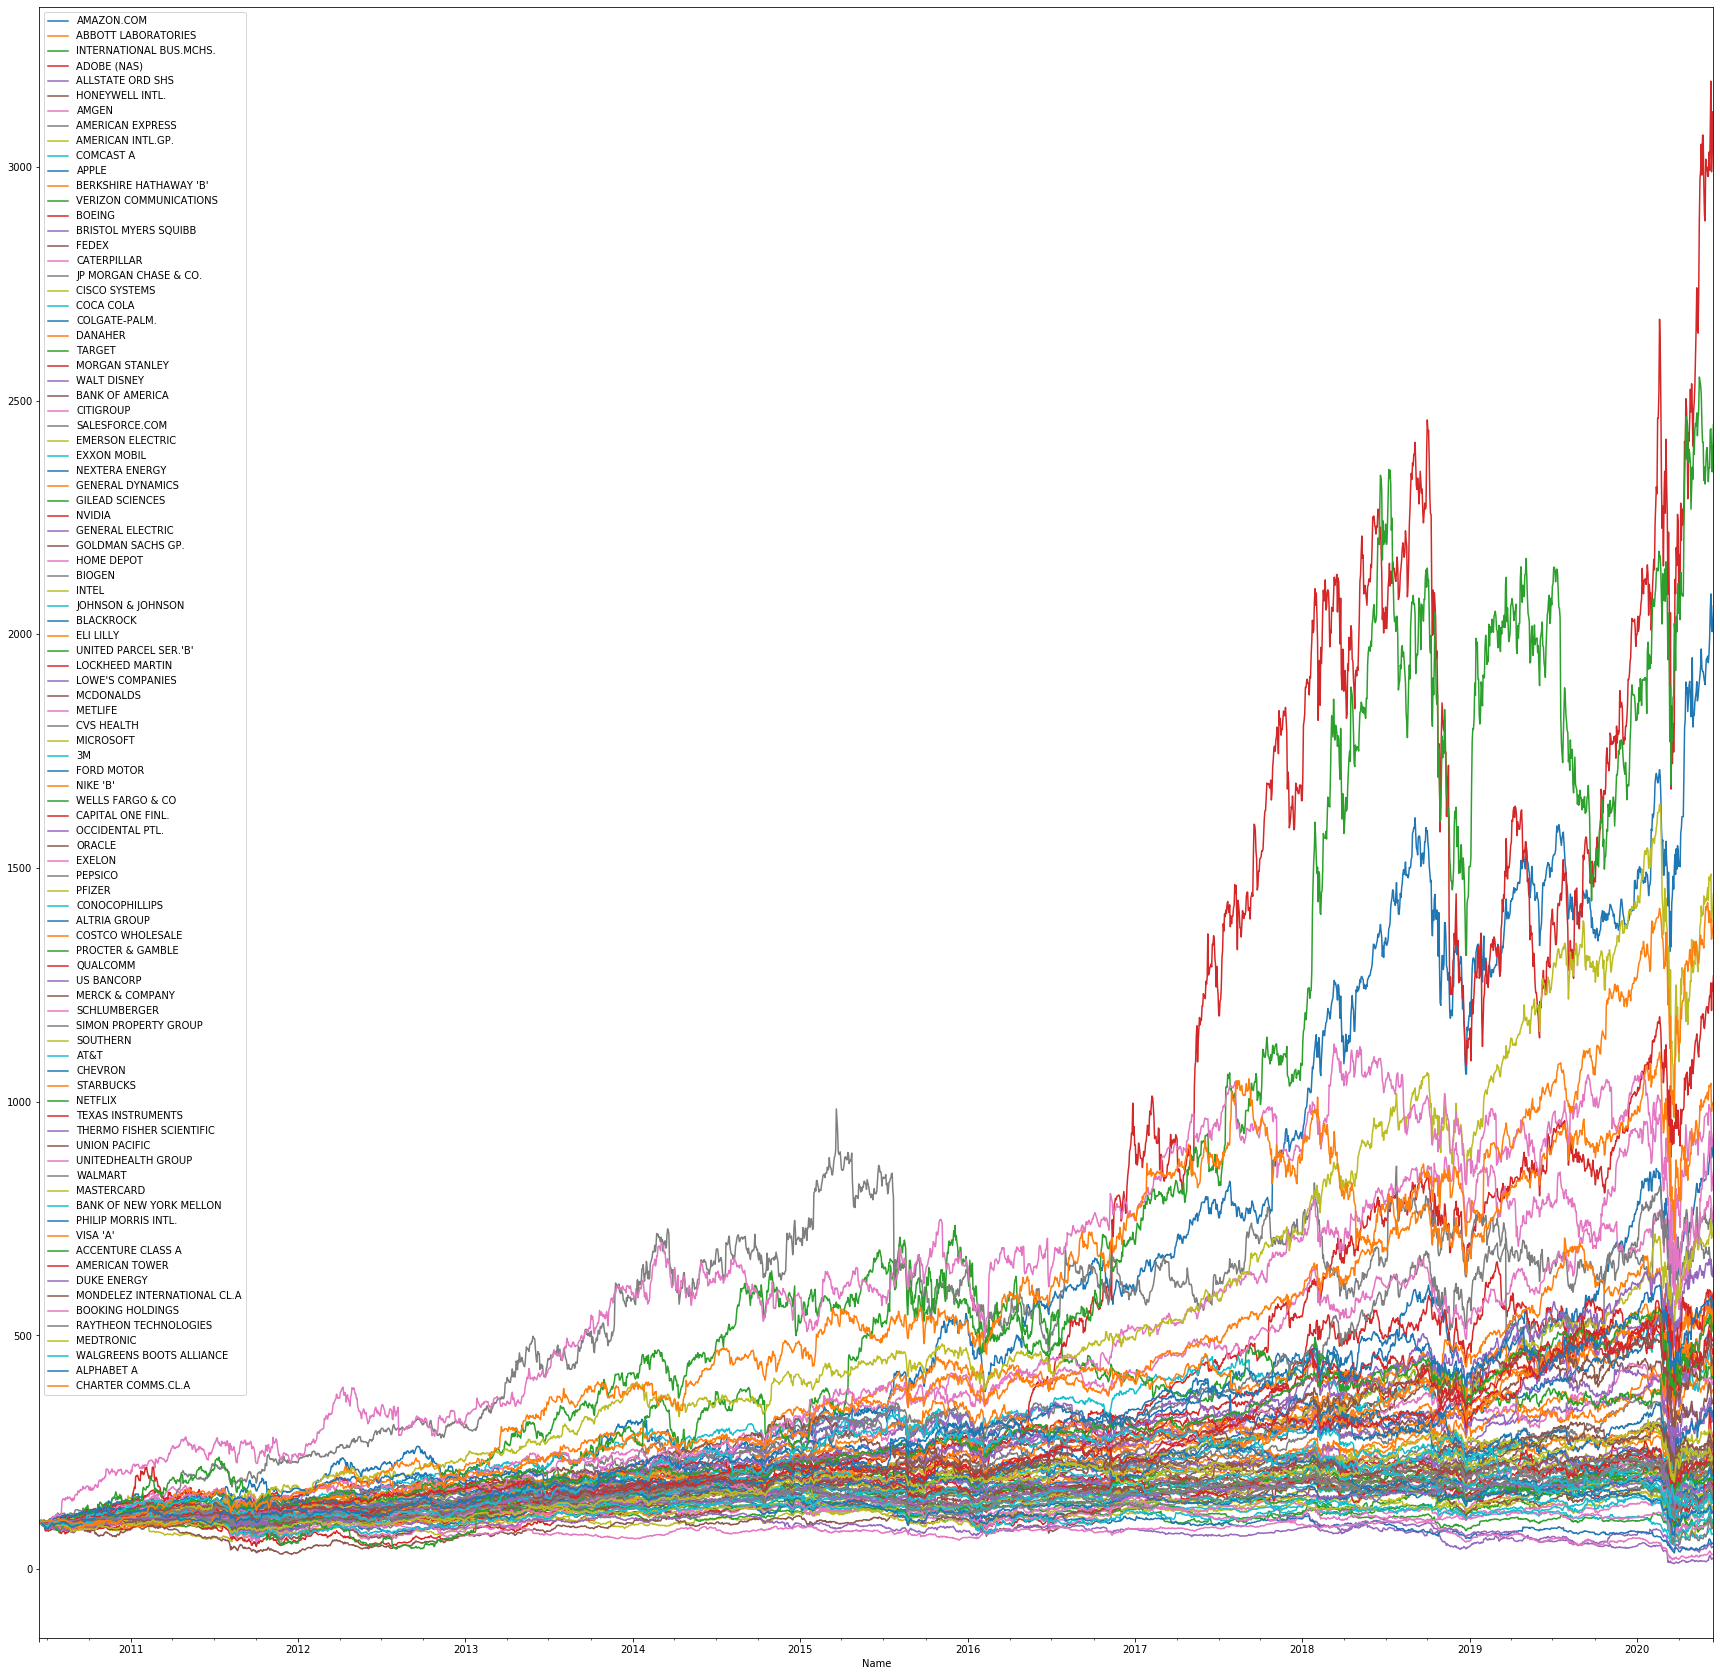

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
(df / df.iloc[0] * 100).plot(figsize=(30, 30))
plt.savefig('stat_01.png')

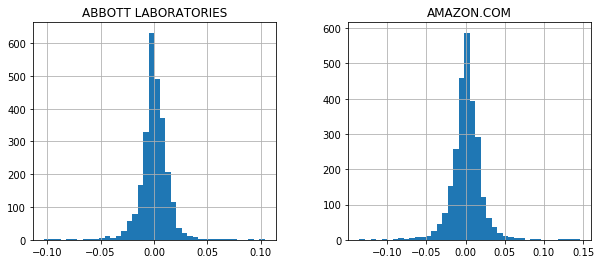

In [3]:
noa = len(symbols)
df = df[symbols]
rets = np.log(df / df.shift(1))
rets[symbols[:2]].hist(bins=40, figsize=(10, 4))
plt.savefig('stat_2.png')

In [4]:
import quandl
import datetime
quandl.ApiConfig.api_key = ''
Wk_Bank_Discount_Rate_52=quandl.get("USTREASURY/BILLRATES" ,
                          start_date=datetime.datetime(2010, 6, 16), 
                          end_date=datetime.datetime(2020, 6, 16))




In [5]:
3653/(52*7)

10.035714285714286

In [6]:
52*7*11-3653

351

In [7]:
yield_list=[]
for i in range(11):
    yield_list.append(Wk_Bank_Discount_Rate_52[datetime.datetime(2010, 6, 16)+datetime.timedelta(days=364*i):]\
                      ["52 Wk Bank Discount Rate"][0])

In [8]:
yield_list

[0.28, 0.18, 0.17, 0.13, 0.1, 0.26, 0.58, 1.14, 2.24, 1.99, 0.17]

In [9]:
risk_free10_11=(yield_list[10]/100)/(365/(365-351))

In [10]:
risk_free10_11

6.52054794520548e-05

In [13]:
risk_free_all=(1+yield_list[0]/100)*(1+yield_list[1]/100)*(1+yield_list[2]/100)*\
(1+yield_list[3]/100)*(1+yield_list[4]/100)*(1+yield_list[5]/100)*(1+yield_list[6]/100)*\
             (1+yield_list[7]/100)*(1+yield_list[8]/100)*(1+yield_list[9]/100)*(1+risk_free10_11/100)-1

In [24]:
risk_free=risk_free_all/(10+(351/365))

In [25]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data,frequency=252)


EF_min = EfficientFrontier(mu, S)

EF_min.min_volatility()

EF_min.portfolio_performance(verbose=True)

Expected annual return: 10.5%
Annual volatility: 12.9%
Sharpe Ratio: 0.66


(0.10454020479360981, 0.12867502727067331, 0.6570055323615821)

Expected annual return: 10.5%
Annual volatility: 12.9%
Sharpe Ratio: 0.66


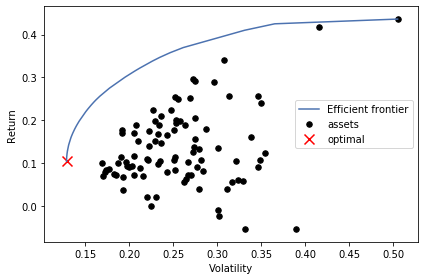

In [28]:
import pypfopt
from pypfopt import plotting

%matplotlib inline
cla = pypfopt.CLA(mu, S)
cla.weights=EF_min.weights
cla.portfolio_performance(verbose=True)
ax=plotting.plot_efficient_frontier(cla,showfig = True)

In [29]:

sum(EF_min.weights*mu)

0.10454020479360979

In [30]:
EF_min_weights=EF_min.clean_weights()
sorted(EF_min_weights.items(), key=lambda x:x[1],reverse=True)[:20]

[('VERIZON COMMUNICATIONS', 0.15551),
 ('WALMART', 0.12965),
 ('MCDONALDS', 0.10823),
 ('JOHNSON & JOHNSON', 0.10205),
 ('COCA COLA', 0.09447),
 ('PROCTER & GAMBLE', 0.0707),
 ('DUKE ENERGY', 0.05586),
 ('BRISTOL MYERS SQUIBB', 0.05568),
 ('ALTRIA GROUP', 0.05148),
 ('COSTCO WHOLESALE', 0.04357),
 ('SOUTHERN', 0.02808),
 ("UNITED PARCEL SER.'B'", 0.02455),
 ('TARGET', 0.01669),
 ('LOCKHEED MARTIN', 0.01385),
 ('CHARTER COMMS.CL.A', 0.01265),
 ('NETFLIX', 0.01045),
 ('AMAZON.COM', 0.00771),
 ('GILEAD SCIENCES', 0.00765),
 ('PFIZER', 0.00666),
 ('MERCK & COMPANY', 0.00453)]

In [31]:


EF = EfficientFrontier(mu, S)
weights = EF.max_sharpe(risk_free_rate=risk_free)

EF.portfolio_performance(verbose=True)

Expected annual return: 28.1%
Annual volatility: 18.2%
Sharpe Ratio: 1.44


(0.28120409139050345, 0.18156539826704796, 1.4386226334068466)

In [32]:
l=[]
for i in weights.values():
    l.append(i)

In [33]:
sum(np.array(l)*mu)

0.2812040913905034

Expected annual return: 28.1%
Annual volatility: 18.2%
Sharpe Ratio: 1.44


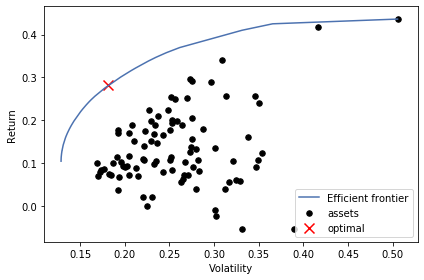

In [34]:

line=np.arange(0,0.3,0.01)

%matplotlib inline
cla = pypfopt.CLA(mu, S)
cla.weights=EF.weights
cla.portfolio_performance(verbose=True)
ax=plotting.plot_efficient_frontier(cla,showfig = True)

In [35]:
clean_weights=cla.clean_weights()
sorted(clean_weights.items(),key=lambda x:x[1],reverse=True)[:20]

[('CHARTER COMMS.CL.A', 0.21036),
 ('NEXTERA ENERGY', 0.17848),
 ('AMAZON.COM', 0.15912),
 ('COSTCO WHOLESALE', 0.0917),
 ('NVIDIA', 0.08397),
 ('NETFLIX', 0.08362),
 ('UNITEDHEALTH GROUP', 0.07044),
 ('MASTERCARD', 0.04063),
 ('APPLE', 0.02799),
 ('ELI LILLY', 0.02711),
 ('BIOGEN', 0.02658),
 ('ABBOTT LABORATORIES', 0.0),
 ('INTERNATIONAL BUS.MCHS.', 0.0),
 ('ADOBE (NAS)', 0.0),
 ('ALLSTATE ORD SHS', 0.0),
 ('HONEYWELL INTL.', 0.0),
 ('AMGEN', 0.0),
 ('AMERICAN EXPRESS', 0.0),
 ('AMERICAN INTL.GP.', 0.0),
 ('COMCAST A', 0.0)]

In [36]:
weights = np.random.random(noa)
weights /= np.sum(weights)

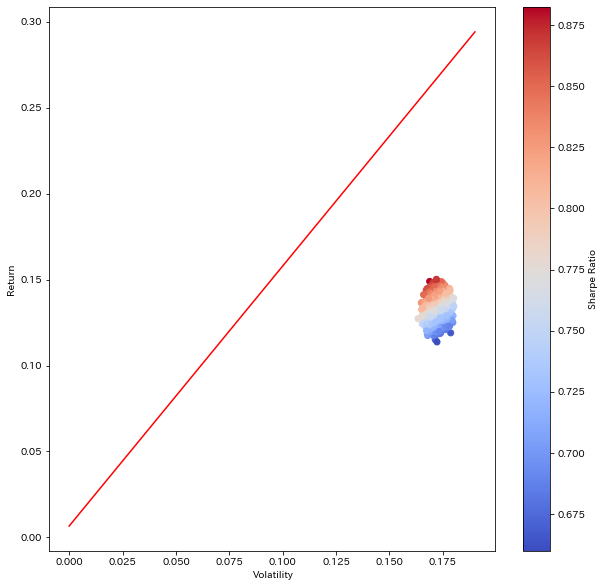

In [40]:
import matplotlib.pyplot as plt 
import japanize_matplotlib 
%matplotlib inline
noa = len(symbols)
rets = (df / df.shift(1))-1

weights = np.random.random(noa)
weights /= np.sum(weights)
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
    
prets = np.array(prets)
pvols = np.array(pvols)
line=np.arange(0,0.2,0.01)
y=((cla.portfolio_performance()[0]-risk_free)/cla.portfolio_performance()[1])*line+risk_free

plt.figure(figsize=(10, 10))
plt.scatter(pvols, prets, c=prets / pvols,marker='o', cmap='coolwarm')
plt.plot(line,y,'r', lw=1.5)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')

## Conclusion
I optimize the portofolio using Minimum Variance model and Tangency portfolio model.This two model’s weight is so much different in TOP 20. Optimizing 92 stocks in 3653 days is a tough job, because you can’t use normal way, the Calculation will be very large and very slow.So the number of monte carlo sampling could only reach around 2500 times without using library. The Minimum Variance model’s sharp ratio is 0.66 which did have lower performance than Tangency portfolio model whcih is 1.44, although it have lowest risk called systemic risk. In the other hand Tangency portfolio model have better performance than Market Portfolio and 28.1% annual return much better than Minimum Variance model which is 10.5% despite taking more little more risk.